### Data Preperation
### Week 5 and 6
### Submitter - Himanshu Singh
### Data Formats/Data Structures/Data Sources

#### Activity 5.01: Reading Tabular Data from a Web Page and Creating DataFrames

Open the page in a separate Chrome/Firefox tab and use something like an Inspect Element tool to view the source HTML and understand its structure.
Read the page using bs4.
Find the table structure you will need to deal with (how many tables are there?).


In [2]:
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import pandas as pd
import cloudscraper as cs

# to avoid cloudflare or 403 error using cloudscraper
scraper = cs.create_scraper()
URL = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
response = scraper.get(f"{URL}")
soup = BeautifulSoup(response.content, 'html.parser')

number_of_tables = soup.find_all("table")
print(f"Number of tables on the webpage {len(number_of_tables)}")
#print(soup.prettify())



Number of tables on the webpage 7


Find the right table using bs4.

In [2]:

# Find the main GDP table. Based on the page structure, it is the
# first major 'wikitable sortable sticky-header-multi static-row-numbers'
gdp_table = soup.find_all('table', {'class': 'wikitable sortable sticky-header-multi static-row-numbers'})

# Check if the table was found
if gdp_table:
    print("Main GDP table found successfully.")
else:
    print("Could not find the main GDP table.")

Main GDP table found successfully.


Separate the source names and their corresponding data.
Get the source names from the list of sources you have created.

In [3]:
# The current wikipedia doesn't have the RANk as shown in the book , so skipping that column.


#for table in gdp_table[0].find_all('tr'):
 #   for cell in table.find_all('td'):
        #print(cell.text)

first_column_data = []
second_column_data = []
third_column_data = []
fourth_column_data = []

# 4. Iterate through each table row (<tr>)
for row in gdp_table[0].find_all('tr'):
    # 5. Find all table data cells (<td>) in the current row
    cells = row.find_all(['td', 'th']) # Include 'th' for potential header rows
    # 6. Check if a cell exists and append the text of the first one
    if cells:
      # The first element in the 'cells' list is the first column
        first_column_data.append(cells[0].get_text(strip=True))
        second_column_data.append(cells[1].get_text(strip=True))
        third_column_data.append(cells[2].get_text(strip=True))
        fourth_column_data.append(cells[3].get_text(strip=True))


# Create a dictionary where keys are the column names and values are the lists
datasource1 = {
    'Countries Name': first_column_data,
    'IMF': second_column_data

}

# IMF Source
df_source1 = pd.DataFrame(datasource1)
df_source1








,Countries Name,IMF
0,Country/Territory,IMF(2025)[1][6]
1,World,"117,165,394"
2,United States,"30,615,743"
3,China[n 1],"19,398,577"
4,Germany,"5,013,574"
...,...,...
217,Kiribati,312
218,Marshall Islands,297
219,Nauru,169
220,Montserrat,—


In [4]:


datasource2 = {
    'Countries Name': first_column_data,
    'World Bank': third_column_data

}

# WB Source
df_source2 = pd.DataFrame(datasource2)
df_source2







,Countries Name,World Bank
0,Country/Territory,World Bank(2022–24)[7]
1,World,"111,326,370"
2,United States,"29,184,890"
3,China[n 1],"18,743,803"
4,Germany,"4,659,929"
...,...,...
217,Kiribati,308
218,Marshall Islands,280
219,Nauru,160
220,Montserrat,—


In [5]:
datasource3 = {
    'Countries Name': first_column_data,
    'UN': fourth_column_data

}

# UN Source
df_source3 = pd.DataFrame(datasource3)
df_source3


,Countries Name,UN
0,Country/Territory,United Nations(2023)[8]
1,World,"100,834,796"
2,United States,"27,720,700"
3,China[n 1],"17,794,782"
4,Germany,"4,525,704"
...,...,...
217,Kiribati,289
218,Marshall Islands,270
219,Nauru,176
220,Montserrat,80


#### Activity 6.01 : In this activity, we will identify and get rid of outliers. Here, we have a CSV file. The goal here is to clean the data by using the knowledge that we have learned about so far and come up with a nicely formatted DataFrame. Identify the type of outliers and their effect on the data and clean the messy data. The dataset that we have used here can be found in the visit_data.csv file. This file contains data generated by a random data generator, and it contains people's names, their gender, email_id, ip_address, and the number of visits they made to a particular web page.

The steps that will help you solve this activity are as follows:

* Read the visit_data.csv file.
* Check for duplicates.

In [6]:
# Define the path to your .csv file
file_path = 'visit_data.csv'

# Load the data into a pandas DataFrame
try:
    # Reading the file
    df_visit = pd.read_csv(file_path)
    print("Data loaded successfully!")
    # Reading first 10 rows
    print(df_visit.head(10)) # Print the first 10 rows of the DataFrame
except FileNotFoundError:
    print(f"Error: The file at {file_path} was not found.")
except Exception as e:
    print(f"An error occurred: {e}")





Data loaded successfully!
   id  first_name   last_name                          email  gender  \
0   1       Sonny        Dahl               sdahl0@mysql.com    Male   
1   2         NaN         NaN              dhoovart1@hud.gov     NaN   
2   3         Gar       Armal         garmal2@technorati.com     NaN   
3   4     Chiarra       Nulty          cnulty3@newyorker.com     NaN   
4   5         NaN         NaN     sleaver4@elegantthemes.com     NaN   
5   6     Raymund  Ingerfield     ringerfield5@microsoft.com     NaN   
6   7  Wilhelmina      Dagnan           wdagnan6@nytimes.com  Female   
7   8         NaN         NaN  mdewilde7@creativecommons.org  Female   
8   9      Gunter    Lisamore          glisamore8@disqus.com     NaN   
9  10      Luelle    Scinelli           lscinelli9@issuu.com  Female   

        ip_address   visit  
0    135.36.96.183  1225.0  
1  237.165.194.143   919.0  
2   166.43.137.224   271.0  
3   139.98.137.108  1002.0  
4    46.117.117.27  2434.0  
5   90.

In [7]:
# Returns the total count of duplicate rows (excluding the first occurrence)
total_duplicates = df_visit.duplicated().sum()
print(f"There are {total_duplicates} duplicate rows.")

first_name_duplicates = df_visit.first_name.duplicated().sum()
print(f"There are {first_name_duplicates} duplicate first names.")

last_name_duplicates = df_visit.last_name.duplicated().sum()
print(f"There are {last_name_duplicates} duplicate lastnames.")

email_duplicates = df_visit.email.duplicated().sum()
print(f"There are {email_duplicates} duplicate email.")

#print(df_visit.first_name.duplicated())

There are 0 duplicate rows.
There are 320 duplicate first names.
There are 299 duplicate lastnames.
There are 0 duplicate email.


In [8]:
# Check whether any essential column contains NaN

print(f"The column Email contains NaN - {df_visit.email.isnull().values.any() }")

print(f"The column IP contains NaN - {df_visit.ip_address.isnull().values.any() }")

print(f"The column Visits contains NaN - {df_visit.visit.isnull().values.any() }")


The column Email contains NaN - False
The column IP contains NaN - False
The column Visits contains NaN - True


In [9]:
# Get rid of outliers

# Report the size difference

column_name = 'visit'

# 1. Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_visit[column_name].quantile(0.25)
Q3 = df_visit[column_name].quantile(0.75)

# 2. Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# 3. Define the outlier boundaries (fences)
# Data points outside 1.5 * IQR below Q1 or above Q3 are considered outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 4. Filter the DataFrame to keep only non-outliers
df_cleaned_iqr = df_visit[(df_visit[column_name] >= lower_bound) & (df_visit[column_name] <= upper_bound)]

print("--- Original Data Statistics ---")
print(df_visit[column_name].describe())

print("\n--- IQR Bounds ---")
print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")


print("\n--- Cleaned Data (IQR Method) ---")
print(f"Original size: {len(df_visit)}")
print(f"Cleaned size: {len(df_cleaned_iqr)}")
print(df_cleaned_iqr)

--- Original Data Statistics ---
count     974.000000
mean     1497.976386
std       838.959460
min         1.000000
25%       794.500000
50%      1477.000000
75%      2224.250000
max      2998.000000
Name: visit, dtype: float64

--- IQR Bounds ---
Q1: 794.50
Q3: 2224.25
IQR: 1429.75
Lower Bound: -1350.12
Upper Bound: 4368.88

--- Cleaned Data (IQR Method) ---
Original size: 1000
Cleaned size: 974
       id first_name  last_name                         email  gender  \
0       1      Sonny       Dahl              sdahl0@mysql.com    Male   
1       2        NaN        NaN             dhoovart1@hud.gov     NaN   
2       3        Gar      Armal        garmal2@technorati.com     NaN   
3       4    Chiarra      Nulty         cnulty3@newyorker.com     NaN   
4       5        NaN        NaN    sleaver4@elegantthemes.com     NaN   
..    ...        ...        ...                           ...     ...   
994   995        NaN        NaN            hlowethrm@army.mil  Female   
995   996     A

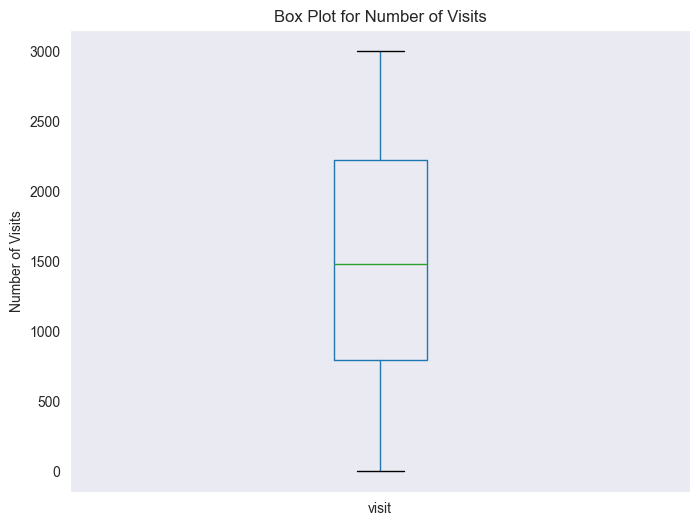

In [10]:
# Create a box plot to check for outliers.

import matplotlib.pyplot as plt
# Create the box plot for the 'visits' column
plt.figure(figsize=(8, 6))
df_visit.boxplot(column=['visit'])
plt.title('Box Plot for Number of Visits')
plt.ylabel('Number of Visits')
plt.grid(False)

# Save the plot (or use plt.show() in a local environment)
#plt.savefig('visits_boxplot.png')
#plt.close()

In [11]:
# Get rid of any outliers.

df1 = df_visit[(df_visit['visit'] <= 2900) & (df_visit['visit'] >= 100)]
df1

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0
...,...,...,...,...,...,...,...
994,995,NaN,NaN,hlowethrm@army.mil,Female,104.234.36.172,747.0
995,996,Averil,Pickover,apickoverrn@vk.com,Male,10.45.16.167,1305.0
996,997,Walton,Hallewell,whallewellro@nasa.gov,NaN,231.224.238.232,2531.0
998,999,Sapphira,Terron,sterronrq@wordpress.org,NaN,24.77.234.208,250.0


#### Insert data into a SQL Lite database – create a table with the following data below that you will create yourself (Hint on how to create the SQL: Python for Data Analysis 2nd edition page 191, Python for Data Analysis 3rd Edition: Page 199):

     a. Name, Address, City, State, Zip, Phone Number
     b. Add at least 10 rows of data and submit your code with a query generating your results.

In [12]:
import sqlite3
from faker import Faker
import pandas as pd # Used here to display the results cleanly

# --- 1. Connect to the Database ---
# Connects to 'member_info.db'. If it doesn't exist, it will be created.
conn = sqlite3.connect('member_info.db')
c = conn.cursor()

# --- 2. Create the Table ---
# Creates a table named 'members' with the specified columns.
c.execute('''
    CREATE TABLE IF NOT EXISTS members (
        Name TEXT,
        Address TEXT,
        City TEXT,
        State TEXT,
        Zip TEXT,
        PhoneNumber TEXT
    )
''')
conn.commit()
print("Table 'members' created successfully.")


Table 'members' created successfully.


In [13]:

fake = Faker()
num_records = 10
fake_client_data = []

for _ in range(num_records):
    # Generate realistic data using Faker providers
    name = fake.name()
    address = fake.street_address()
    city = fake.city()
    state = fake.state_abbr()
    zip_code = fake.postcode()
    phone_number = fake.phone_number()

    # Append the record tuple to the list
    fake_client_data.append((name, address, city, state, zip_code, phone_number))

print(f"Generated {num_records} fake client records.")

insert_query = 'INSERT INTO members (Name, Address, City, State, Zip, PhoneNumber) VALUES (?, ?, ?, ?, ?, ?)'

# Use executemany for efficient batch insertion
c.executemany(insert_query, fake_client_data)

# Commit the changes to the database
conn.commit()
print("Successfully inserted fake data into the 'members' table.")

# --- 3. Query and Display a Sample Result ---
c.execute('SELECT * FROM members')
sample_members = c.fetchall()

# Display the sample results using a DataFrame
columns = ['Name', 'Address', 'City', 'State', 'Zip', 'Phone Number']
df_sample = pd.DataFrame(sample_members, columns=columns)

print("\n--- Sample of Inserted Fake Data ---")
print(df_sample)

# --- 4. Close Connection ---
conn.close()


Generated 10 fake client records.
Successfully inserted fake data into the 'members' table.

--- Sample of Inserted Fake Data ---
                    Name                           Address  \
0   Dr. Lindsay Anderson               458 Samantha Skyway   
1           Megan Garner      5563 William Drive Suite 995   
2       Victoria Johnson      30750 Lopez Viaduct Apt. 133   
3          Robin Hawkins                  51334 Harvey Row   
4          Kimberly Byrd      26628 Joshua Inlet Suite 280   
5          Jennifer Ford                   2010 Smith Isle   
6          Matthew Clark         247 Duffy Square Apt. 605   
7             Erin Jones                 0532 Amy Villages   
8       Bradley Marshall     7185 Christina Ports Apt. 256   
9       Michelle Chapman      67064 Murray Shores Apt. 851   
10      Brittany Paul MD                90823 Timothy Loop   
11           John Miller       84536 Cole Plains Suite 346   
12          Gary Chapman             7002 Solomon Turnpike   
13